In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

import sys
sys.path.append("../")

from main import plot_cm

In [2]:
train = pd.read_csv("../data/silver/train.tsv", sep="\t")
valid = pd.read_csv("../data/silver/valid.tsv", sep="\t")

train.head()

,text,label
0,the feeling of biting a pillow while you re cr...,not depression
1,why i am depressed and why i self harm. kind o...,moderate
2,i hate life m. sometimes it feels like there i...,not depression
3,"i am tired and exhausted,seriously! removed",moderate
4,why do people come on this forum to brag about...,not depression


In [3]:
vectorizer = CountVectorizer()

train_features = vectorizer.fit_transform(train.text)
valid_features = vectorizer.transform(valid.text)

In [4]:
model = LogisticRegression(n_jobs=-1, max_iter=3000)

model.fit(train_features, train.label)

LogisticRegression(max_iter=3000, n_jobs=-1)

In [5]:
valid_preds = model.predict(valid_features)

                precision    recall  f1-score   support

      moderate       0.65      0.64      0.64       510
not depression       0.58      0.62      0.60       382
        severe       0.53      0.44      0.48       108

      accuracy                           0.61      1000
     macro avg       0.59      0.57      0.58      1000
  weighted avg       0.61      0.61      0.61      1000



'./reports/figures/cm_000.png'

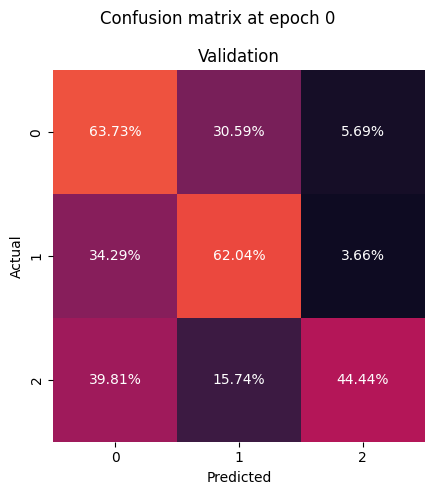

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

report = classification_report(valid.label, valid_preds)

cm = confusion_matrix(valid.label, valid_preds, normalize="true")

print(report)
plot_cm([
    [cm, "Validation"]
], epoch=0)

---

                precision    recall  f1-score   support

      moderate       0.74      0.59      0.65      2169
not depression       0.36      0.55      0.44       848
        severe       0.32      0.33      0.33       228

      accuracy                           0.56      3245
     macro avg       0.47      0.49      0.47      3245
  weighted avg       0.61      0.56      0.57      3245
 [[0.58644537 0.3526971  0.06085754]
 [0.41863208 0.54716981 0.03419811]
 [0.4254386  0.24122807 0.33333333]]


'./reports/figures/cm_000.png'

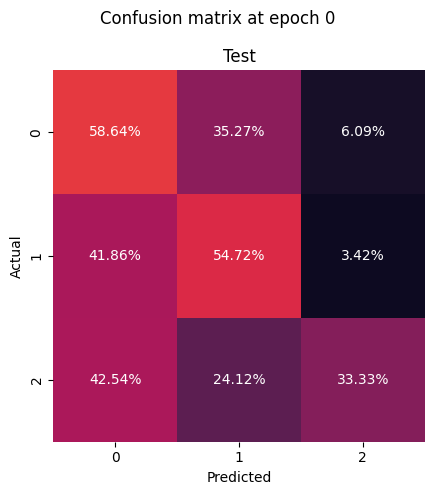

In [7]:
test = pd.read_csv("../data/silver/test.tsv", sep="\t")

test_features = vectorizer.transform(test.text)
test_preds = model.predict(test_features)


report = classification_report(test.label, test_preds)
cm = confusion_matrix(test.label, test_preds, normalize="true")

print(report, cm)
plot_cm([
    [cm, "Test"]
], epoch=0)